# Melbourne Housing Market

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 372F-3690

 Directory of C:\Users\USER\Documents\Py_Project\CBD Robotics\week5

04/20/2018  10:27 AM    <DIR>          .
04/20/2018  10:27 AM    <DIR>          ..
04/19/2018  04:49 PM    <DIR>          .ipynb_checkpoints
04/20/2018  10:27 AM            18,849 axis.png
04/18/2018  06:31 PM            37,758 Food_Truck.ipynb
04/18/2018  02:30 PM             1,473 Food_Truck.txt
04/11/2018  06:46 PM         1,008,918 Heteroskedasticity.pptx
04/18/2018  03:34 PM           755,196 Lecture7v1.pdf
04/11/2018  08:34 PM           260,096 Maximum-likelihood estimation.ppt
04/19/2018  04:53 PM            59,205 melbourne_Assignment.PNG
03/22/2018  04:19 AM         5,018,236 Melbourne_housing_FULL.csv
04/19/2018  06:16 PM           116,547 Melbourne-Housing-Market.ipynb
04/19/2018  05:43 PM    <DIR>          Melbourne-Housing-Market-EDA-and-Regression-master
04/19/2018  05:43 PM         2,877,483 Melbourne-Housing-Market-EDA-and-Regression-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Melbourne_housing_FULL.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [5]:
data.head(10).columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [8]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [7]:
data.shape

(34857, 21)

---------------------------------------------------------------

# Data Cleaning

<img src="http://www.elimhk.com/myblog/wp-content/uploads/2017/04/axis.png",width=500,height=350>


In [16]:
scrubbed = data.dropna(axis=0, how='any')

In [18]:
scrubbed.shape

(8887, 21)

In [21]:
scrubbed.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


34857 - 8887 = 25970 has been deleted owing to having NULL

## The correlation between Price and Rooms 

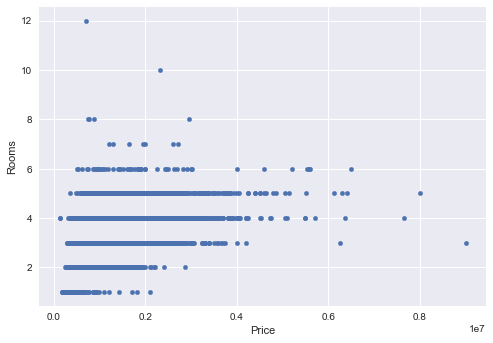

In [24]:
scrubbed.plot(y='Rooms',x='Price',kind='scatter')

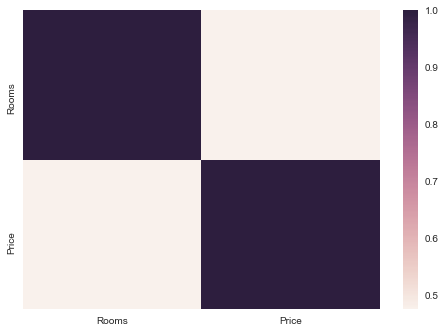

In [23]:
import seaborn as sns
Corr_Rooms_Price=pd.DataFrame([scrubbed.Rooms,scrubbed.Price]).T
corr = Corr_Rooms_Price.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

## The correlation between Price and Distance 

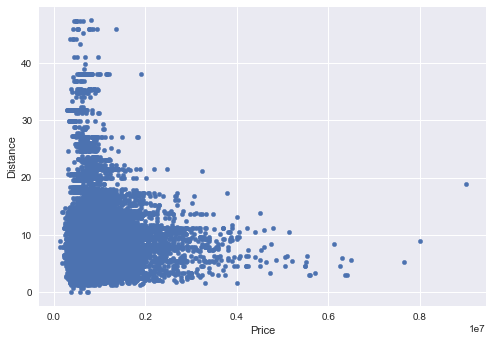

In [25]:
scrubbed.plot(y='Distance',x='Price',kind='scatter')

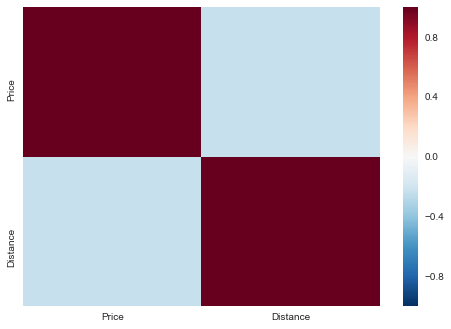

In [26]:
corr_Distance_Price = pd.DataFrame([scrubbed.Price,scrubbed.Distance]).T
corr_DP=corr_Distance_Price.corr()
sns.heatmap(corr_DP,xticklabels=corr_DP.columns.values,yticklabels=corr_DP.columns.values)

In [27]:
corr_Distance_Price.corr()

,Price,Distance
Price,1.000000,-0.231212
Distance,-0.231212,1.000000


## The correlation between Price and Cars 

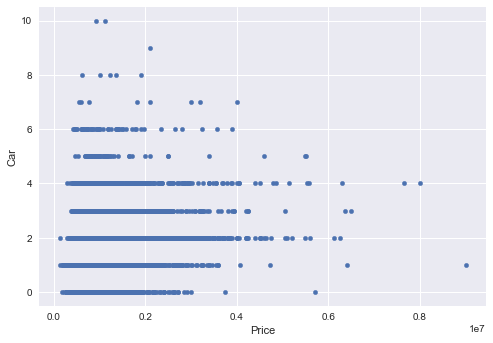

In [28]:
scrubbed.plot(y='Car',x='Price',kind='scatter')

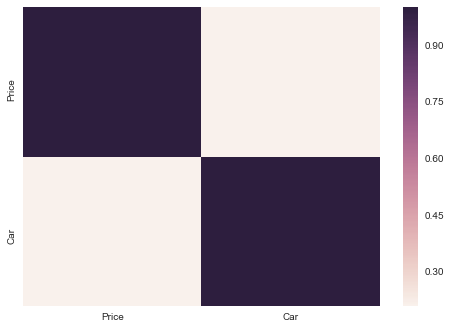

In [29]:
corr_Car_Price = pd.DataFrame([scrubbed.Price,scrubbed.Car]).T
corr_CP=corr_Car_Price.corr()
sns.heatmap(corr_CP,xticklabels=corr_CP.columns.values,yticklabels=corr_CP.columns.values)

## Check for which suburb what is its mean price?

In [41]:
data.Suburb.value_counts().head(20).unique

<bound method Series.unique of Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
Kew               467
Brighton          456
Brunswick         444
South Yarra       435
Hawthorn          428
Northcote         424
Camberwell        423
Balwyn North      420
Essendon          409
Coburg            405
Glenroy           400
Brighton East     393
Pascoe Vale       378
St Kilda          374
Port Melbourne    371
Name: Suburb, dtype: int64>

#### Formatting_Columns

In [53]:
def formatting_columns(x):
    x[0] = '{0:.2f}'.format(x[0])
    x[1] = '{0:.0f}'.format(x[1])
    x[2] = '{0:.0f}'.format(x[2])
    x[3] = '{0:.0f}'.format(x[3])
    return x

In [54]:
scrubbed['Price'].groupby(scrubbed.Suburb).agg(['mean','count','max','min']).sort_values(by='mean',ascending=False).apply(formatting_columns,axis=1).head(20)

,mean,count,max,min
Suburb,,,,
Kooyong,3080000.00,1,3080000,3080000
Middle Park,2665115.38,26,6400000,535000
Canterbury,2467462.96,27,8000000,722000
Deepdene,2380000.00,2,3080000,1680000
Malvern,2272594.59,37,6300000,365000
Brighton,2118946.75,96,5150000,290000
Beaumaris,2007500.00,15,3778000,1354000
Balwyn,2004811.59,69,4600000,460000
Balwyn North,1965493.00,100,4050000,685000


--------------------------------------------------------------------

# Holdout - Train Test  & Cross Validation

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
train,test= train_test_split(scrubbed,test_size=0.2,random_state=42) 
# test_size represents the absolute number of test samples.
# random_state is the seed used by the random number generator

In [151]:
train.shape

(7109, 21)

In [152]:
test.shape

(1778, 21)

In [153]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train.Rooms.values.reshape(train.shape[0],1),train.Price.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [154]:
model.coef_ # Estimated coefficients for the linear regression problem

array([ 343079.51438142])

In [155]:
model.intercept_ #hệ số tự do

33128.158065606141

In [156]:
predict = model.predict(test.Rooms.values.reshape(test.shape[0],1))

In [157]:
predict

array([ 1748525.7299727 ,  1405446.21559128,  1062366.70120986, ...,
        1405446.21559128,  1062366.70120986,   719287.18682844])

## Use Root Mean-Square error  -  root-mean-square deviation (RMSD) or root-mean-square error (RMSE)

(lấy căn của sai số bình phương trung bình)
là sự khác biệt giữa các ước lượng và những gì được đánh giá

<img src="https://i.stack.imgur.com/eG03B.png", width=300, height = 250>

In [130]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test['Price'],predict)

299965500993.7934

##### muốn biết được cái con số kia là tốt hay ko tốt, ta so sánh với cái predict của toàn bộ data

In [131]:
predict_data= model.predict(scrubbed.Price.values.reshape(scrubbed.shape[0],1))

In [132]:
mean_squared_error(scrubbed['Price'],predict_data)

1.9490912299325887e+23

##### thì cái residual này càng nhỏ là sai số nó càng tốt. Ta có thể so sánh 2 kết quả predict giữa tập train và toàn bộ data.

ở đây 2 giá trị predict không khác nhau nhiều, giá trị predict của toàn bộ data có vẻ tốt hơn tý

# Show Cross-Validation

In [113]:
from sklearn.model_selection import cross_val_predict

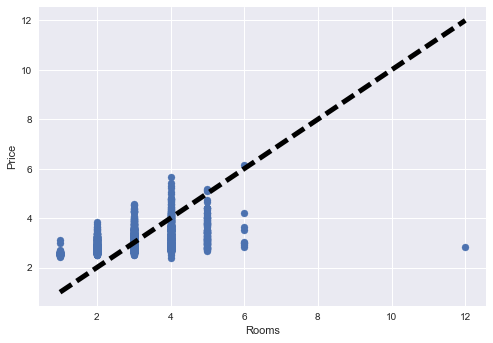

In [146]:
lr= linear_model.LinearRegression()
y= test.Rooms.values
predicted = cross_val_predict(lr,test.Price.values.reshape(test.shape[0],1),test.Rooms,cv=10)  #cv = 10(k) fold cross-validation
fig, ax =  plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=5)
ax.set_xlabel("Measured")  # trục x là giá trị thực
ax.set_ylabel("Predicted")  # trục y là giá trị dự đoán
plt.show()

CV : int, cross-validation generator or an iterable, optional
    Determines the cross-validation splitting strategy.
    Possible inputs for cv are:

    - None, to use the default 3-fold cross validation,
    - integer, to specify the number of folds in a `(Stratified)KFold`,
    - An object to be used as a cross-validation generator.
    - An iterable yielding train, test splits.

    For integer/None inputs, if the estimator is a classifier and ``y`` is
    either binary or multiclass, :class:`StratifiedKFold` is used. In all
    other cases, :class:`KFold` is used.

    Refer :ref:`User Guide <cross_validation>` for the various
    cross-validation strategies that can be used here.

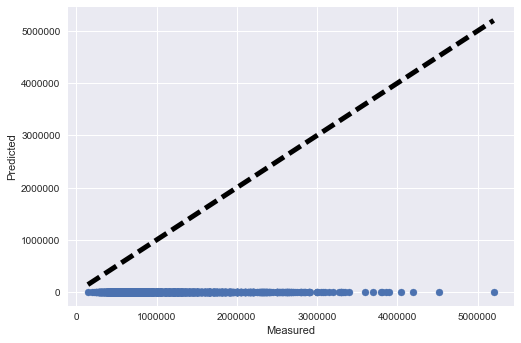

In [160]:
fig, ax =  plt.subplots()
predicted = cross_val_predict(lr,test.Rooms.values.reshape(test.shape[0],1),test.Rooms,cv=10)  #cv = 10 (k) fold cross-validation
y=test.Price.values
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=5)
ax.set_xlabel("Measured")  # trục x là giá trị thực
ax.set_ylabel("Predicted")  # trục y là giá trị dự đoán
plt.show()

In [161]:
mean_squared_error(test.Price,predicted)

1535060466873.0432